# Machine Learning in Wine Authentication - SVM Classification Approach

## [Understanding Wine Fraud](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud involves deceptive practices in the wine industry, primarily seen in two forms. The first involves adulterating wine by adding less expensive substances like various juices and sometimes harmful additives to enhance color or taste. The second type of fraud is the mislabeling of lower-grade wines as higher-end brands.

![Image of wine bottles](wine.jpg)

## Project Objectives

A high-end wine distribution company, having been a recent target of fraudulent activities, undertook a chemical analysis of their wine collection. This company, known for exporting premium, costly wines, fell victim to a scam involving a supplier who sold them low-quality wine disguised as top-tier products. They have now engaged you to develop a machine learning algorithm capable of identifying substandard (fraudulent) wine samples. The company seeks to understand the feasibility and effectiveness of such a technological approach in detecting these discrepancies.

Data Reference: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

## Loading necessary libraries

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the data

In [37]:
df = pd.read_csv('wine_fraud.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


The provided output is a summary of a pandas DataFrame, a key data structure in Python used for data manipulation and analysis. This DataFrame, consisting of 6,497 entries indexed from 0 to 6,496, details 13 columns of data related to wine characteristics. Among these, 11 columns (like 'fixed acidity', 'volatile acidity', 'citric acid', etc.) are numerical in nature, indicated by the 'float64' data type, while two columns ('quality' and 'type') are categorical, denoted as 'object' type. The non-null count in each column confirms that there are no missing values in the dataset. This structure, particularly the mix of chemical properties and quality ratings, suggests the DataFrame is well-suited for data analysis or machine learning tasks, such as predicting wine quality or classifying wine types based on their physicochemical properties. The DataFrame also occupies approximately 660.0 KB of memory, indicating its size in terms of storage.

In [38]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


## Exploratory Data Analysis

### Checking the quality variable

In [39]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

The result of `df['quality'].unique()` indicates that the 'quality' column contains two unique values: 'Legit' and 'Fraud'. These values likely represent the classification or labeling of wine samples, where 'Legit' signifies legitimate or genuine wine samples, and 'Fraud' suggests fraudulent or counterfeit wine samples. This information is valuable for understanding the categorical labels in the 'quality' column, which may be used for tasks such as classifying wines as either legitimate or fraudulent in a machine learning context.

In [40]:
df["quality"].value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

This result shows how many rows are Legit  we see 6251, and the rest farud rows 246 and shows frequency

### Barchart showing the distribution of quality

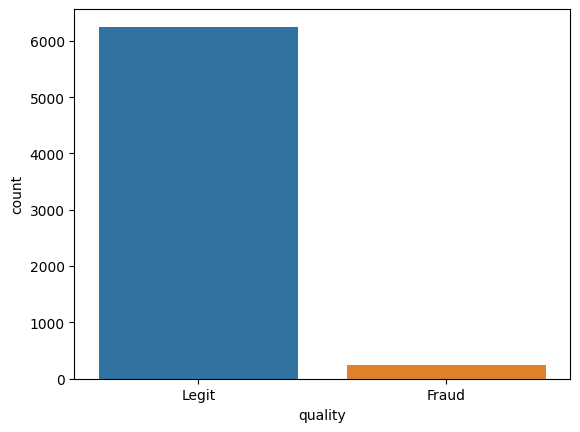

In [41]:
sns.countplot(x='quality',hue='quality', data=df);

### Barchart showing the distribution of wine type by quality

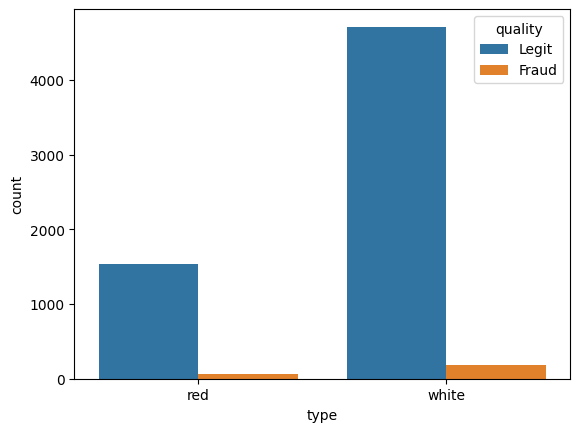

In [42]:
sns.countplot(x='type',hue='quality', data=df);

In [43]:
df["type"].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

this frequency table shows type of white type wine 48898 rows and red types of rows 159 and also we see
frequency distribution for categorical data

### Percentage fraud by wine type

In [44]:
reds = df[df['type'] == 'red']
whites = df[df['type'] == 'white']

In [45]:
round(100 * len(reds[reds['quality']=='Fraud'])/len(reds),3)

3.94

Around 4% of the red wines are fraud in our data.

In [46]:
round(100 * len(whites[whites['quality']=='Fraud'])/len(whites), 2)

3.74

It shows that 3.74% of the white wines are fraud in our data.

### Correlation between Fraud quality wines and other variables

In [47]:
df['Fraud'] = df['quality'].map({'Legit':0,
                                 'Fraud':1})

The code df['Fraud'] = df['quality'].map({'Legit': 0, 'Fraud': 1}) adds a new column called 'Fraud' to the DataFrame 'df'. This new column is created by mapping the values in the existing 'quality' column to binary values, where 'Legit' is mapped to 0 and 'Fraud' is mapped to 1.

The code `df.corr()['Fraud']` computes the correlation coefficients between the 'Fraud' column and all other columns in the DataFrame 'df'. Each correlation value measures the strength and direction of the linear relationship between a specific feature and the likelihood of fraud in wine samples. Positive correlations (e.g., 'volatile acidity') suggest that as the feature increases, the likelihood of fraud also increases, while negative correlations (e.g., 'free sulfur dioxide') imply that higher values of the feature correspond to a decreased likelihood of fraud. The 'Fraud' column's self-correlation is 1.0, as expected. These correlation values are valuable for identifying which features may be more influential in determining the presence of fraud in the dataset, aiding in feature selection and model building for fraud detection tasks.

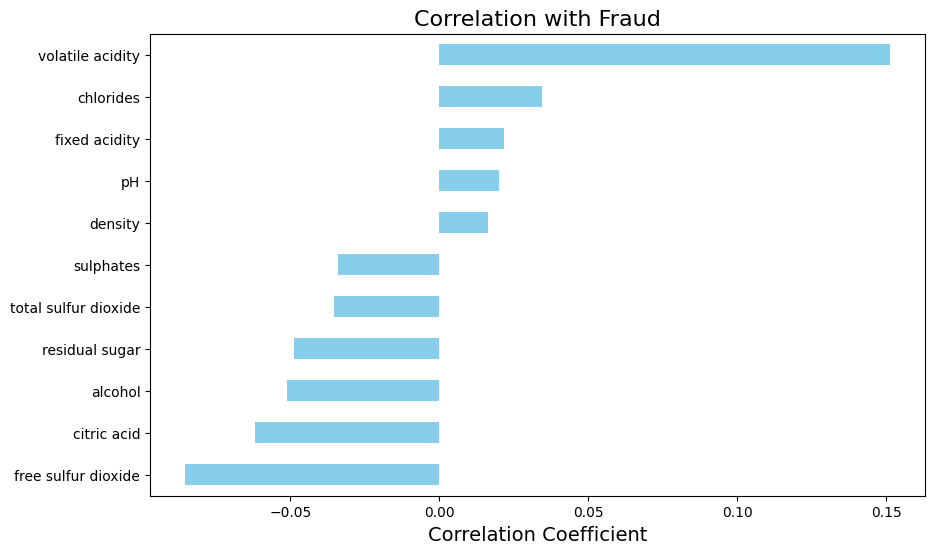

In [48]:
import matplotlib.pyplot as plt

# Compute correlations with Fraud
corr = df.corr(numeric_only=True)['Fraud'].drop('Fraud')

# Plot
corr.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Correlation with Fraud', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.show()


In [ ]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Correlation with Fraud', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)  

### Barplot to show the correlation

### Clustermap showing the relationship between the variables

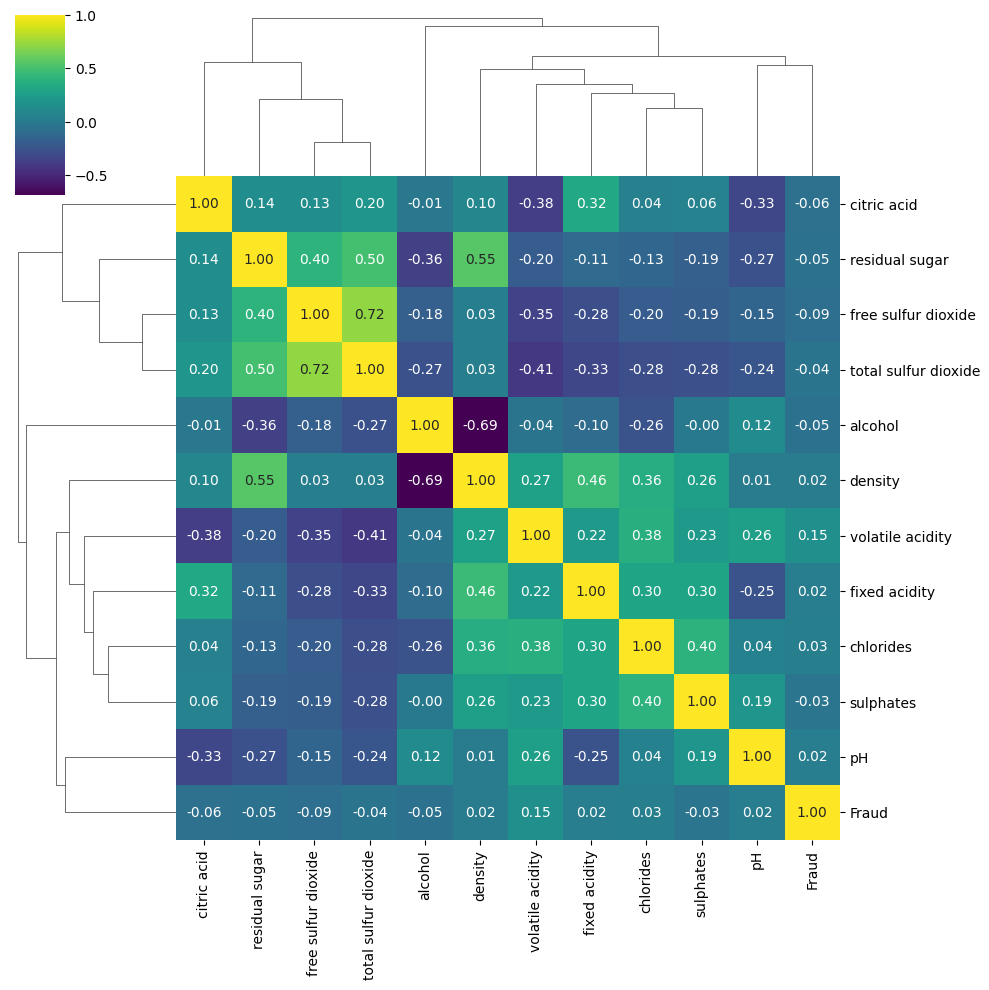

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation only on numeric columns
corr = df.corr(numeric_only=True)

# Create clustermap
sns.clustermap(corr, cmap='viridis', annot=True, fmt=".2f")

plt.show()


In [ ]:
sns.clustermap(df.corr(), cmap = 'viridis');

----
## Machine Learning Model

### Transforming the categorical column "type," originally represented as either "red" or "white," into binary dummy variables

In [50]:
df = df.drop('Fraud', axis=1)

In [51]:
df['type'] = pd.get_dummies(df['type'], drop_first=True)

### Separate out the data into X features and y target label ("quality" column)

In [57]:
df['type'] 

0       False
1       False
2       False
3       False
4       False
        ...  
6492     True
6493     True
6494     True
6495     True
6496     True
Name: type, Length: 6497, dtype: bool

In [52]:
x = df.drop('quality', axis=1)

In [58]:
y = df['quality']
y.value_counts()

quality
Legit    6251
Fraud     246
Name: count, dtype: int64

### Perform a Train|Test split on the data, with a 10% test size. Using a random state of 101

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=101)

### Scaling the X train and X test data.

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

### Creating an instance of a Support Vector Machine classifier. 
Previously we have left this model "blank", (e.g. with no parameters). However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call.

In [62]:
from sklearn.svm import SVC 
svc = SVC(class_weight='balanced')

### Using a GridSearchCV to run a grid search for the best C and gamma parameters.

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {'C':[0.01,0.1,0.5,1],
              'kernel':['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto'],
              'degree':[2,3,4,5]
              }

In [73]:
grid = GridSearchCV(svc, param_grid)

In [ ]:
grid.fit(scaled_x_train, y_train)

In [ ]:
grid.best_params_

{'C': 0.01, 'degree': 5, 'gamma': 'auto', 'kernel': 'poly'}

### Displaying the confusion matrix and classification report for the model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
grid_preds = grid.predict(scaled_x_test)

In [88]:
cm = confusion_matrix(y_test, grid_preds)
cm

array([[  7,  20],
       [ 21, 602]], dtype=int64)

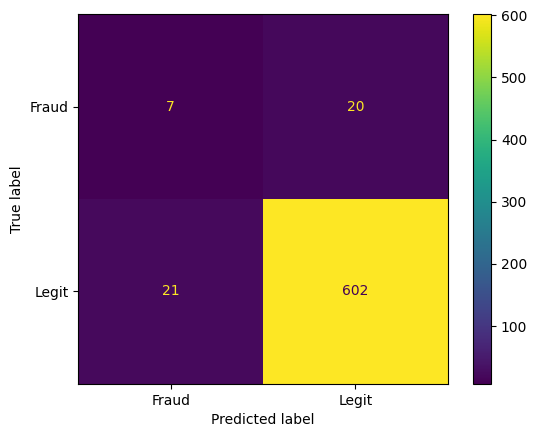

In [89]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fraud', 'Legit'])
cm_disp.plot();

In [90]:
print(classification_report(y_test, grid_preds))

              precision    recall  f1-score   support

       Fraud       0.25      0.26      0.25        27
       Legit       0.97      0.97      0.97       623

    accuracy                           0.94       650
   macro avg       0.61      0.61      0.61       650
weighted avg       0.94      0.94      0.94       650



### Finally, Let's conclude the project.
The confusion matrix, classification report, and evaluation metrics provide insights into the performance of a machine learning model. In this case, the model appears to have been evaluated for binary classification, possibly for detecting wine fraud (Fraud) and legitimate wines (Legit).

The confusion matrix shows the following:
- True Fraud: 7 samples were correctly predicted as Fraud, while 20 were incorrectly predicted as Legit.
- True Legit: 21 samples were incorrectly predicted as Fraud, while 602 were correctly predicted as Legit.

The classification report presents metrics such as precision, recall, and F1-score for each class (Fraud and Legit). It indicates that the model has a higher precision, recall, and F1-score for the Legit class, suggesting that it performs well in identifying legitimate wines. However, its performance for the Fraud class is lower, with lower precision, recall, and F1-score values.

Overall, the model has a high accuracy of 94%, but this may be misle it struggles with detecting fraudulent ones. Whether to useading due to class imbalance. While it performs well in identifying legitimate wines, this model depends on the specific use case and the consequences of false positives and false negatives. Realistically, improving the model's performance on fraud detection, possibly through feature engineering or different algorithms, would be advisable before deploying it for practical applications where wine fraud detection is critical.